## Initial imports and loading data with Pandas

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('mode.chained_assignment', None)

In [111]:
data = pd.read_csv('movie_metadata.csv')

## Taking a look at the data

You need to "run" the two cells below, to do that select the cell and press:  *`Shift-Enter`*

In [112]:
# Run this cell (to do so press Shift-Enter)
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [113]:
data.shape

(5043, 28)

In [114]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Some key points from this table:
- Avg movie duration is 107.2 minutes
- Avg imdb is 6.44
- Avg number of users reviews is 272

## Cleaning the data

### Dealing with duplicates

In [115]:
print ('Number of duplicates in data: {}'.format(
    sum(data.duplicated(subset=['movie_title', 'title_year'], keep=False))))

Number of duplicates in data: 241


In [116]:
data = data.drop_duplicates(subset=['movie_title', 'title_year'], keep='first').copy()

### Fixing Null and some zero values

In [117]:
# check if data has any null/nan values
data.isnull().values.any()

True

In [118]:
# Check how many values are null in each column
def show_missing_data(data):
    missing_data = data.isnull().sum().reset_index()
    missing_data.columns = ['column_name', 'missing_count']
    missing_data['filling_factor'] = (data.shape[0] - missing_data['missing_count']) / data.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)

show_missing_data(data)[:5]

,column_name,missing_count,filling_factor
0,gross,863,82.455784
1,budget,485,90.140272
2,aspect_ratio,326,93.372637
3,content_rating,301,93.880870
4,plot_keywords,152,96.909941


As we are working with the Gross Box Office, rows without it are of no use. So we will exclude those films that are missing the Gross Box Office.

In [119]:
data.dropna(subset=['gross'], how='all', inplace=True)
show_missing_data(data)[:5]

,column_name,missing_count,filling_factor
0,budget,266,93.441815
1,aspect_ratio,104,97.435897
2,content_rating,64,98.422091
3,plot_keywords,40,99.013807
4,actor_3_name,13,99.679487


Fill out missing budget datapoints with the median budget for the year it was released.

In [120]:
median_budget_per_year = data.groupby('title_year')['budget'].transform('median')
data['budget'].fillna(median_budget_per_year, inplace=True)

show_missing_data(data)[:5]

,column_name,missing_count,filling_factor
0,aspect_ratio,104,97.435897
1,content_rating,64,98.422091
2,plot_keywords,40,99.013807
3,actor_3_name,13,99.679487
4,actor_3_facebook_likes,13,99.679487


Fill out the rest of the missing data

In [121]:
data.fillna(0, inplace=True)

Delete all rows where `title_year` is zero

In [122]:
data = data[data['title_year'] != 0]

Budgets are in each country's currency so we are going to use only US movies

In [123]:
data = data[data['country'] == 'USA']

## Understanding the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1135ad6a0>]], dtype=object)

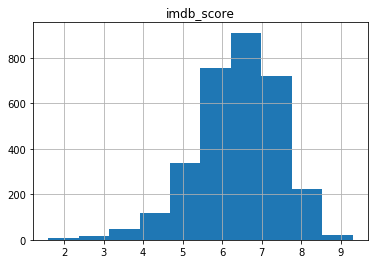

In [124]:
# IMDb rating distribution
data.hist(column='imdb_score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113d896a0>]], dtype=object)

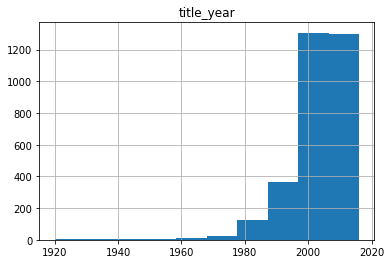

In [125]:
# Movies per year
data.hist(column='title_year')

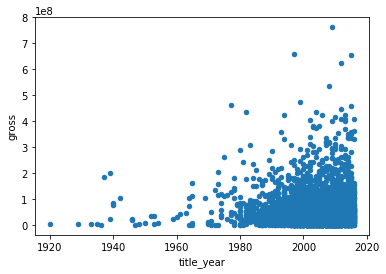

In [126]:
# title year vs gross
data.plot.scatter(x='title_year', y='gross')

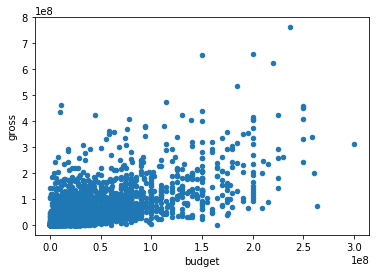

In [127]:
# budget vs gross
data.plot.scatter(x='budget', y='gross')

In [128]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.276410,0.194054,0.277109,0.177424,0.490599,0.605560,0.254447,-0.028637,0.584183,0.490987,0.392820,0.279051,0.355521,0.239905,0.703175
duration,0.276410,1.000000,0.212631,0.142682,0.096774,0.287811,0.374870,0.138688,0.006417,0.373240,0.302871,-0.110414,0.151916,0.375195,0.179422,0.254575
director_facebook_likes,0.194054,0.212631,1.000000,0.125168,0.088397,0.139295,0.321770,0.119029,-0.050684,0.245595,0.095895,-0.063333,0.120035,0.222328,0.062444,0.176630
actor_3_facebook_likes,0.277109,0.142682,0.125168,1.000000,0.245738,0.278116,0.274568,0.472264,0.104918,0.218029,0.265414,0.117133,0.540728,0.086806,0.069219,0.296768
actor_1_facebook_likes,0.177424,0.096774,0.088397,0.245738,1.000000,0.132503,0.177834,0.948474,0.060155,0.128698,0.152637,0.085072,0.376346,0.115996,0.067928,0.125529
gross,0.490599,0.287811,0.139295,0.278116,0.132503,1.000000,0.641340,0.215555,-0.033651,0.556798,0.643383,0.029693,0.235691,0.263086,0.130203,0.377839
num_voted_users,0.605560,0.374870,0.321770,0.274568,0.177834,0.641340,1.000000,0.248020,-0.039742,0.788317,0.415249,0.015390,0.249913,0.496036,0.136354,0.528969
cast_total_facebook_likes,0.254447,0.138688,0.119029,0.472264,0.948474,0.215555,0.248020,1.000000,0.081265,0.188605,0.229556,0.116657,0.624125,0.134126,0.088090,0.205439
facenumber_in_poster,-0.028637,0.006417,-0.050684,0.104918,0.060155,-0.033651,-0.039742,0.081265,1.000000,-0.083901,-0.028431,0.080274,0.066698,-0.077956,0.008159,0.006265
num_user_for_reviews,0.584183,0.373240,0.245595,0.218029,0.128698,0.556798,0.788317,0.188605,-0.083901,1.000000,0.417202,0.016439,0.203815,0.342346,0.146783,0.404040


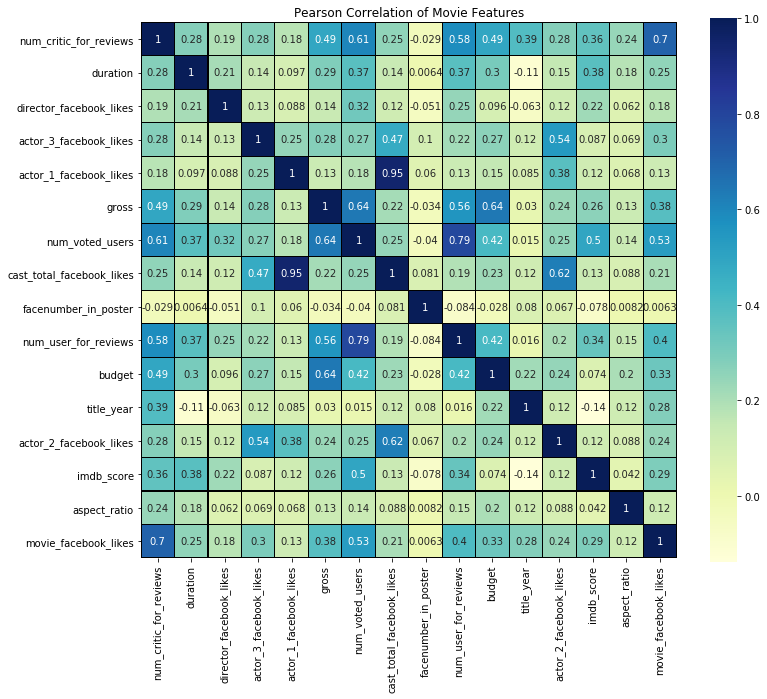

In [129]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')

# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

As we can see from the heatmap, there are regions (features) where we can see quite positive linear correlations amongst each other, given the darker shade of the colours - top left-hand corner and bottom right quarter. This is a good sign as it means we may be able to find linearly correlated features for which we can perform PCA projections on.

In [130]:
data.corr()['gross'].sort_values(ascending=False)

gross                        1.000000
budget                       0.643383
num_voted_users              0.641340
num_user_for_reviews         0.556798
num_critic_for_reviews       0.490599
movie_facebook_likes         0.377839
duration                     0.287811
actor_3_facebook_likes       0.278116
imdb_score                   0.263086
actor_2_facebook_likes       0.235691
cast_total_facebook_likes    0.215555
director_facebook_likes      0.139295
actor_1_facebook_likes       0.132503
aspect_ratio                 0.130203
title_year                   0.029693
facenumber_in_poster        -0.033651
Name: gross, dtype: float64

The gross box office correlates strongly with num_voted_users, num_users_for_reviews and movie_facebook_likes. But some of those features are also highly correlated among each other (as you can see in the heatmap above).

## Gross Box Office Prediction

### Getting numerical data

In [131]:
numerical_columns = data.dtypes[data.dtypes != 'object'].index
data = data[numerical_columns]

# we drop aspect_ratio, as it doesn't provide any useful info
data.drop('aspect_ratio', axis=1, inplace=True)
data.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0


### Preparing train and test datasets

In [132]:
train, test = train_test_split(data, test_size=0.2)
target_train = train.pop('gross')
target_test = test.pop('gross')

In [133]:
print('Train data: {} / {} = {}'.format(len(train), len(data), float(len(train)/len(data))))
print('Test data: {} / {} = {}'.format(len(test), len(data), float(len(test)/len(data))))

Train data: 2523 / 3154 = 0.7999365884590995
Test data: 631 / 3154 = 0.20006341154090043


### Linear Regression

In [134]:
model = LinearRegression()
model.fit(train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
prediction = model.predict(test)

Mean squared error: 1768372535623432.50
Variance score: 0.62


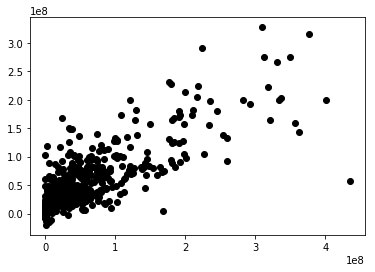

In [136]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, prediction))

# Plot outputs
plt.scatter(target_test, prediction,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

### Random Forest

In [137]:
forest = RandomForestRegressor(
    max_depth=25,
    min_samples_split=15,
    n_estimators=1000,
    random_state=1)

forest.fit(train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [138]:
forest.feature_importances_

array([ 0.02713062,  0.0337546 ,  0.01355234,  0.01309111,  0.01051859,
        0.55276625,  0.01283872,  0.00440598,  0.03774392,  0.2087178 ,
        0.03870702,  0.01029144,  0.02312934,  0.01335225])

In [139]:
forest_prediction = forest.predict(test)

Mean squared error: 1534463194924046.00
Variance score: 0.67


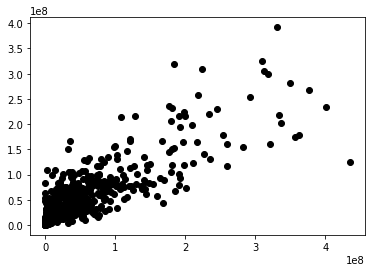

In [140]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, forest_prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, forest_prediction))

# Plot outputs
plt.scatter(target_test, forest_prediction,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

## Dropping post-fact data

There are post-fact variables in our data set making the prediction more accurate. Things like `num_voted_users` and `num_user_for_reviews` are after the fact metrics, so probably not as useful for prediction.

In [141]:
train.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
3714,471.0,117.0,212.0,896.0,11000.0,326494,17738,0.0,340.0,5000000.0,2013.0,3000.0,8.0,65000
1309,75.0,83.0,7.0,485.0,2000.0,24216,4024,0.0,162.0,24000000.0,1999.0,577.0,4.1,401


In [142]:
train.drop(['num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews', 'imdb_score', 'movie_facebook_likes'], axis=1, inplace=True)
test.drop(['num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews', 'imdb_score', 'movie_facebook_likes'], axis=1, inplace=True)
train.head(2)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes
3714,117.0,212.0,896.0,11000.0,17738,0.0,5000000.0,2013.0,3000.0
1309,83.0,7.0,485.0,2000.0,4024,0.0,24000000.0,1999.0,577.0


In [143]:
second_forest = RandomForestRegressor(
    max_depth=25,
    min_samples_split=15,
    n_estimators=1000,
    random_state=1)

second_forest.fit(train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [144]:
second_prediction = second_forest.predict(test)

Mean squared error: 2435425084286572.50
Variance score: 0.48


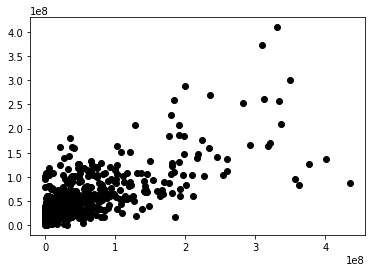

In [145]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, second_prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, second_prediction))

# Plot outputs
plt.scatter(target_test, second_prediction,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()